# Credit Card-Customer Attrition

#### Import libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

#### Loading Dataset

In [91]:
data = pd.read_csv("credit-card.csv")
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


#### Data Wrangling

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [93]:
pd.isnull(data).any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [94]:
data.duplicated().sum()

0

In [95]:
data['Marital_Status'].value_counts() 

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

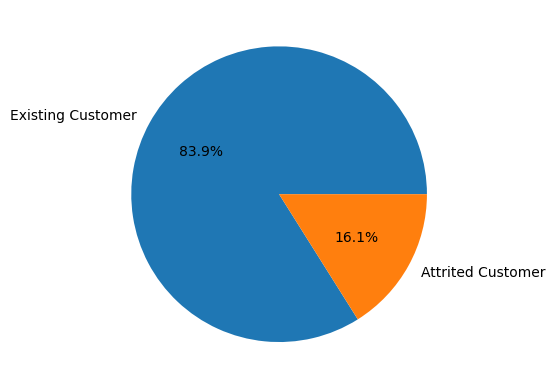

In [96]:
plt.pie(data['Attrition_Flag'].value_counts(),labels=['Existing Customer','Attrited Customer'],autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Income Distribution')

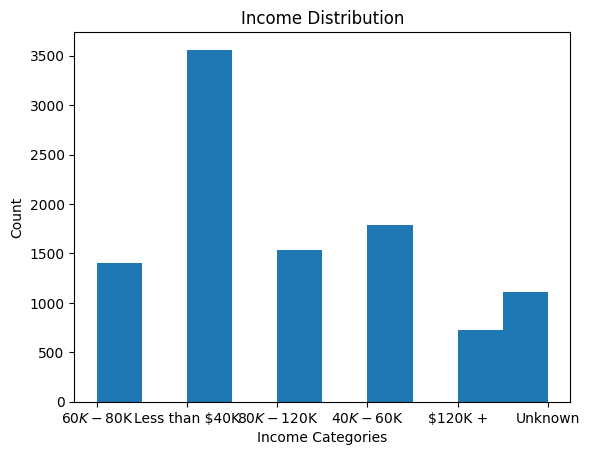

In [97]:
plt.hist(data['Income_Category'])
plt.xlabel('Income Categories')
plt.ylabel('Count')
plt.title('Income Distribution')

#### Replacing Unknown value

In [98]:
data['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [99]:
data['Education_Level'].mode()

0    Graduate
Name: Education_Level, dtype: object

In [100]:
data['Income_Category'].mode()

0    Less than $40K
Name: Income_Category, dtype: object

In [101]:
data['Education_Level'].replace('Unknown','Graduate',inplace=True)
data['Marital_Status'].replace('Unknown','Married',inplace=True)
data['Income_Category'].replace('Unknown','Less than $40K',inplace=True)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Graduate,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Married,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


#### Statistical Summary

In [102]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [103]:
for col in data.select_dtypes('object').columns:
    print(data[col].unique())

['Existing Customer' 'Attrited Customer']
['M' 'F']
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
['Blue' 'Gold' 'Silver' 'Platinum']


In [104]:
data.value_counts(data['Attrition_Flag'])

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

#### Categorical Encoding

In [105]:
ordenc = OrdinalEncoder(categories=[['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],
                                     ['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],
                                    ['Blue','Silver','Gold','Platinum']])

data[['Education_Level','Income_Category','Card_Category']] = ordenc.fit_transform(data[['Education_Level','Income_Category','Card_Category']])

In [106]:
data = pd.get_dummies(data,columns=['Gender','Marital_Status'],dtype=int)

In [107]:
labenc = LabelEncoder()
data['Attrition_Flag'] = labenc.fit_transform(data['Attrition_Flag'])

In [108]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,768805383,1,45,3,1.0,2.0,0.0,39,5,1,...,1.335,1144,42,1.625,0.061,0,1,0,1,0
1,818770008,1,49,5,3.0,0.0,0.0,44,6,1,...,1.541,1291,33,3.714,0.105,1,0,0,0,1
2,713982108,1,51,3,3.0,3.0,0.0,36,4,1,...,2.594,1887,20,2.333,0.000,0,1,0,1,0
3,769911858,1,40,4,1.0,0.0,0.0,34,3,4,...,1.405,1171,20,2.333,0.760,1,0,0,1,0
4,709106358,1,40,3,0.0,2.0,0.0,21,5,1,...,2.175,816,28,2.500,0.000,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,2,3.0,1.0,0.0,40,3,2,...,0.703,15476,117,0.857,0.462,0,1,0,0,1
10123,710638233,0,41,2,3.0,1.0,0.0,25,4,2,...,0.804,8764,69,0.683,0.511,0,1,1,0,0
10124,716506083,0,44,1,1.0,0.0,0.0,36,5,3,...,0.819,10291,60,0.818,0.000,1,0,0,1,0
10125,717406983,0,30,2,3.0,1.0,0.0,36,4,3,...,0.535,8395,62,0.722,0.000,0,1,0,1,0


#### Feature Selection

Text(0.5, 1.0, 'Feature Correlation Heatmap')

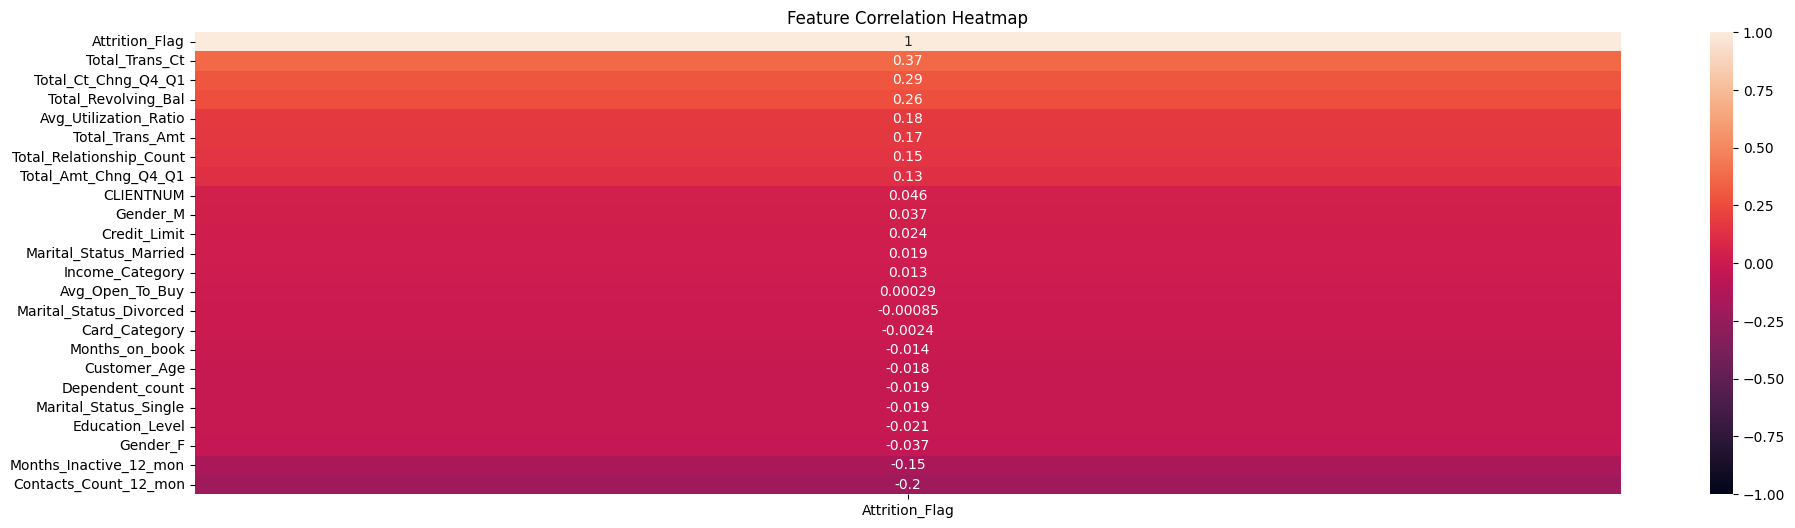

In [109]:
plt.figure(figsize=(23, 6))
hm = sns.heatmap(data.corr()[['Attrition_Flag']].sort_values(by='Attrition_Flag', ascending=False),vmin=-1, 
                 vmax=1,annot=True)
hm.set_title('Feature Correlation Heatmap')

#### Training, Testing and Validation sets

In [180]:
X = data[['Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Avg_Utilization_Ratio','Total_Trans_Amt',
          'Total_Relationship_Count','Total_Amt_Chng_Q4_Q1']]
Y = data['Attrition_Flag']

In [181]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print("Training data X(Attributes) - ",X_train.shape)
print("Testing data X(Attributes) - ",X_test.shape)

Training data X(Attributes) -  (8101, 7)
Testing data X(Attributes) -  (2026, 7)


#### Attribute Scaling

In [182]:
scaled = StandardScaler()
scaled.fit(X_train)
X_train = scaled.transform(X_train)
X_test = scaled.transform(X_test)

#### Model training & testing

In [183]:
model1 = KNeighborsClassifier(n_neighbors=100)
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

In [184]:
accuracy1 = accuracy_score(Y_test, Y_pred1)*100 
print(accuracy1)

91.4116485686081


In [185]:
metrics = classification_report(Y_test, Y_pred1)     # generating confusion matrix for the model 1
print('Classification metrics is \n ',metrics)

Classification metrics is 
                precision    recall  f1-score   support

           0       0.85      0.57      0.68       329
           1       0.92      0.98      0.95      1697

    accuracy                           0.91      2026
   macro avg       0.88      0.78      0.82      2026
weighted avg       0.91      0.91      0.91      2026



In [186]:
model2 = SVC()
model2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_test)

In [187]:
accuracy2 = model2.score(X_test, Y_test)*100 
print(accuracy2)

94.32379072063178


In [188]:
model3 = RandomForestClassifier()
model3.fit(X_train, Y_train)
Y_pred3 = model3.predict(X_test)

In [189]:
accuracy3 = model3.score(X_test, Y_test)*100 
print(accuracy3)

95.75518262586377
